<a href="https://colab.research.google.com/github/harsh-reactdev/ml-training/blob/main/id3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris




In [10]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target



In [11]:
# Discretize continuous features (simple binning)
for col in iris.feature_names:
    df[col] = pd.qcut(df[col], q=3, duplicates="drop")



In [12]:
# Entropy
def entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

# Information Gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)

    weighted_entropy = 0
    for v, c in zip(values, counts):
        subset = data[data[feature] == v]
        weighted_entropy += (c / len(data)) * entropy(subset[target])

    return total_entropy - weighted_entropy



In [13]:
# ID3 algorithm
def id3(data, features, target):
    # If all targets are same
    if len(np.unique(data[target])) == 1:
        return data[target].iloc[0]

    # If no features left
    if len(features) == 0:
        return data[target].mode()[0]

    # Select best feature
    gains = {f: information_gain(data, f, target) for f in features}
    best_feature = max(gains, key=gains.get)

    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        subset = data[data[best_feature] == value]
        if subset.empty:
            tree[best_feature][value] = data[target].mode()[0]
        else:
            remaining_features = [f for f in features if f != best_feature]
            tree[best_feature][value] = id3(subset, remaining_features, target)

    return tree

# Train ID3
features = iris.feature_names
tree = id3(df, features, "target")

print(tree)

{'petal width (cm)': {Interval(0.099, 0.867, closed='right'): 0, Interval(0.867, 1.6, closed='right'): {'petal length (cm)': {Interval(2.633, 4.9, closed='right'): 1, Interval(4.9, 6.9, closed='right'): {'sepal length (cm)': {Interval(5.4, 6.3, closed='right'): {'sepal width (cm)': {Interval(1.999, 2.9, closed='right'): 2}}, Interval(6.3, 7.9, closed='right'): 2}}}}, Interval(1.6, 2.5, closed='right'): {'sepal width (cm)': {Interval(1.999, 2.9, closed='right'): 2, Interval(2.9, 3.2, closed='right'): {'petal length (cm)': {Interval(2.633, 4.9, closed='right'): {'sepal length (cm)': {Interval(5.4, 6.3, closed='right'): 2}}, Interval(4.9, 6.9, closed='right'): {'sepal length (cm)': {Interval(5.4, 6.3, closed='right'): 2, Interval(6.3, 7.9, closed='right'): 2}}}}, Interval(3.2, 4.4, closed='right'): 2}}}}


In [16]:
# Handle None predictions by replacing with most common class
import numpy as np

most_common_class = df["target"].mode()[0]

y_pred = [
    pred if pred is not None else most_common_class
    for pred in y_pred
]

y_pred = np.array(y_pred)


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("ID3 Accuracy:", accuracy)


ID3 Accuracy: 0.98


In [18]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=iris.target_names
))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      0.94      0.97        50
   virginica       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



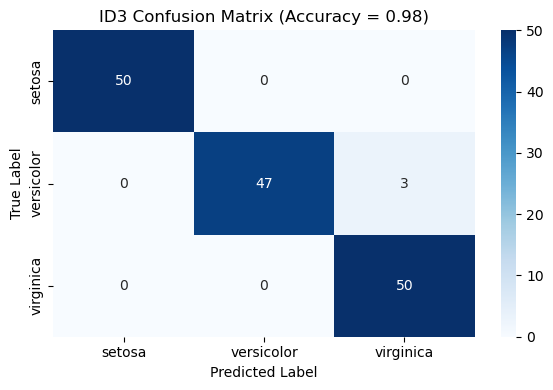

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"ID3 Confusion Matrix (Accuracy = {accuracy:.2f})")
plt.tight_layout()
plt.show()
